<a href="https://colab.research.google.com/github/sftSalman/CNN/blob/main/CNN_Step_by_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def zero_pad(X,pad):
#pad = np.pad(X,((0,0),(pad,pad),(pad,pad)(0,0)),'constant', constant_values =(0,0))
  X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = (0,0))
  return X_pad

In [3]:
x = np.random.randn(4,3,3,2)
x_pad = zero_pad(x,2)
print(x.shape)
print(x_pad.shape)

(4, 3, 3, 2)
(4, 7, 7, 2)


In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

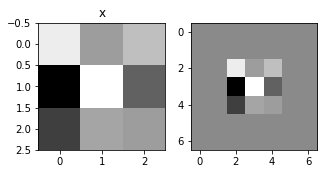

In [5]:
fig , ax = plt.subplots(1,2)
ax[0].set_title('x')
ax[0].imshow(x[0,:,:,0])
ax[1].imshow(x_pad[0,:,:,0])

In [6]:
print('hi')

hi


In [7]:
def conv_single_step(a_slice_prev,W,b):
  s = np.multiply(a_slice_prev,W)
  Z = np.sum(s)
  Z = Z+b
  return Z 

In [8]:
np.random.seed(3)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = [[[4.74084236]]]


In [9]:
def conv_forward(A_prev,W,b,hypermaters):
  (m,n_H_prev,n_W_prev,n_C_prev)=A_prev.shape
  (f,f,n_C_prev,n_C) = W.shape

  stride = hypermaters['stride']
  pad = hypermaters['pad']

  n_H = int((n_H_prev - f + 2 * pad) / stride + 1)
  n_W = int((n_W_prev - f + 2 * pad) / stride + 1) 

  Z = np.zeros((m, n_H, n_W, n_C))

  A_prev_pad = zero_pad(A_prev, pad)
  for i range(m):
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          vert_start = h 
          vert_end = vert_start + f 
          horiz_start = w 
          horiz_end = horiz_start + f
          a_slice_prev = A_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
          z[i,h,w,c] = conv_single_step(a_slice_prev,w[:,:,:,:])


  

In [ ]:
print('hi')